Import the relevant *packages* at the start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
from yahoo_finance import Share
%matplotlib inline

In [2]:
print "\nThe current directory is: ",os.getcwd();
print "\nThe current time is: ", datetime.now(),


The current directory is:  C:\Users\Stephen\Documents

The current time is:  2017-03-30 23:58:22.132000


In [3]:
#Define the tickers and quantity in your portfolio

tickers = ["IASP.L","BRIC.L","IEAG.L","IGUS.L","SEMA.L","CSX5.L","CUKX.L"
            ,"IJPH.L","EUXS.L"]
quantity = [84,73,9,45,24,41,21,83,2037]

Create some functions to pull in data from Yahoo

In [4]:
def close():
    result = []
    for i in tickers:
        result.append(Share(i).get_open())
    return result

def yr_high():
    result = []
    for i in tickers:
        result.append((Share(i).get_year_high()))
    return result

In [5]:
#Load data from Yahoo

df_close = pd.Series(close()).astype(float)
df_yr_high = pd.Series(yr_high())


In [6]:
#Create Dataframe

df = pd.DataFrame({"Tickers":tickers,
                  "Quantity": quantity})

df["Year High"] = df_yr_high
df["Close"] = df_close

In [7]:
df

,Quantity,Tickers,Year High,Close
0,84,IASP.L,2184.78,2124.50
1,73,BRIC.L,2083.50,2058.50
2,9,IEAG.L,125.95,120.59
3,45,IGUS.L,5584.00,5506.00
4,24,SEMA.L,2395.00,2395.00
5,41,CSX5.L,102.830,102.67
6,21,CUKX.L,10809.70,10785.00
7,83,IJPH.L,52.78,51.65
8,2037,EUXS.L,487.01,486.50


In [8]:
## correct for tickers quoted in £ and not pence

df.loc[df["Tickers"] =="IEAG.L", "Close" ] = 100 * df["Close"]
df.loc[df["Tickers"] =="CSX5.L", "Close" ] = 100 * df["Close"]
df.loc[df["Tickers"] =="IJPH.L", "Close" ] = 100 * df["Close"]

df



,Quantity,Tickers,Year High,Close
0,84,IASP.L,2184.78,2124.5
1,73,BRIC.L,2083.50,2058.5
2,9,IEAG.L,125.95,12059.0
3,45,IGUS.L,5584.00,5506.0
4,24,SEMA.L,2395.00,2395.0
5,41,CSX5.L,102.830,10267.0
6,21,CUKX.L,10809.70,10785.0
7,83,IJPH.L,52.78,5165.0
8,2037,EUXS.L,487.01,486.5


In [9]:
# Calculate MV

df["MV"] = ((df["Quantity"] * df["Close"])/100).round(2)

df

,Quantity,Tickers,Year High,Close,MV
0,84,IASP.L,2184.78,2124.5,1784.58
1,73,BRIC.L,2083.50,2058.5,1502.70
2,9,IEAG.L,125.95,12059.0,1085.31
3,45,IGUS.L,5584.00,5506.0,2477.70
4,24,SEMA.L,2395.00,2395.0,574.80
5,41,CSX5.L,102.830,10267.0,4209.47
6,21,CUKX.L,10809.70,10785.0,2264.85
7,83,IJPH.L,52.78,5165.0,4286.95
8,2037,EUXS.L,487.01,486.5,9910.00


In [10]:
#Add subtotal row

sum_row = df[["MV"]].sum()
sum_row

MV    28096.36
dtype: float64

In [11]:
df_sum = pd.DataFrame(data=sum_row).T
df_sum

,MV
0,28096.36


In [12]:
columns = df.columns
columns

df_sum = df_sum.reindex(columns = df.columns)
df_sum

,Quantity,Tickers,Year High,Close,MV
0,NaN,NaN,NaN,NaN,28096.36


In [13]:
df=df.append(df_sum,ignore_index=True)
df

,Quantity,Tickers,Year High,Close,MV
0,84.0,IASP.L,2184.78,2124.5,1784.58
1,73.0,BRIC.L,2083.50,2058.5,1502.70
2,9.0,IEAG.L,125.95,12059.0,1085.31
3,45.0,IGUS.L,5584.00,5506.0,2477.70
4,24.0,SEMA.L,2395.00,2395.0,574.80
5,41.0,CSX5.L,102.830,10267.0,4209.47
6,21.0,CUKX.L,10809.70,10785.0,2264.85
7,83.0,IJPH.L,52.78,5165.0,4286.95
8,2037.0,EUXS.L,487.01,486.5,9910.00
9,NaN,NaN,NaN,NaN,28096.36


In [14]:
df.loc[df["Tickers"] =="IASP.L", "Asset Class" ] = "Property"
df.loc[df["Tickers"] =="BRIC.L", "Asset Class" ] = "Equity"
df.loc[df["Tickers"] =="IEAG.L", "Asset Class" ] = "Bond"
df.loc[df["Tickers"] =="IGUS.L", "Asset Class" ] = "Equity"
df.loc[df["Tickers"] =="SEMA.L", "Asset Class" ] = "Equity"
df.loc[df["Tickers"] =="CSX5.L", "Asset Class" ] = "Equity"
df.loc[df["Tickers"] =="CUKX.L", "Asset Class" ] = "Equity"
df.loc[df["Tickers"] =="IJPH.L", "Asset Class" ] = "Equity"
df.loc[df["Tickers"] =="EUXS.L", "Asset Class" ] = "Equity"

df.loc[df["Tickers"] =="IASP.L", "Region" ] = "Asia"
df.loc[df["Tickers"] =="BRIC.L", "Region" ] = "EM"
df.loc[df["Tickers"] =="IEAG.L", "Region" ] = "Europe"
df.loc[df["Tickers"] =="IGUS.L", "Region" ] = "USA"
df.loc[df["Tickers"] =="SEMA.L", "Region" ] = "EM"
df.loc[df["Tickers"] =="CSX5.L", "Region" ] = "Europe"
df.loc[df["Tickers"] =="CUKX.L", "Region" ] = "UK"
df.loc[df["Tickers"] =="IJPH.L", "Region" ] = "Asia"
df.loc[df["Tickers"] =="EUXS.L", "Region" ] = "Europe"

df

,Quantity,Tickers,Year High,Close,MV,Asset Class,Region
0,84.0,IASP.L,2184.78,2124.5,1784.58,Property,Asia
1,73.0,BRIC.L,2083.50,2058.5,1502.70,Equity,EM
2,9.0,IEAG.L,125.95,12059.0,1085.31,Bond,Europe
3,45.0,IGUS.L,5584.00,5506.0,2477.70,Equity,USA
4,24.0,SEMA.L,2395.00,2395.0,574.80,Equity,EM
5,41.0,CSX5.L,102.830,10267.0,4209.47,Equity,Europe
6,21.0,CUKX.L,10809.70,10785.0,2264.85,Equity,UK
7,83.0,IJPH.L,52.78,5165.0,4286.95,Equity,Asia
8,2037.0,EUXS.L,487.01,486.5,9910.00,Equity,Europe
9,NaN,NaN,NaN,NaN,28096.36,NaN,NaN


In [15]:
df["Pct of MV"] = ((df["MV"] / df.iloc[9,4])*100).round(2)
df

,Quantity,Tickers,Year High,Close,MV,Asset Class,Region,Pct of MV
0,84.0,IASP.L,2184.78,2124.5,1784.58,Property,Asia,6.35
1,73.0,BRIC.L,2083.50,2058.5,1502.70,Equity,EM,5.35
2,9.0,IEAG.L,125.95,12059.0,1085.31,Bond,Europe,3.86
3,45.0,IGUS.L,5584.00,5506.0,2477.70,Equity,USA,8.82
4,24.0,SEMA.L,2395.00,2395.0,574.80,Equity,EM,2.05
5,41.0,CSX5.L,102.830,10267.0,4209.47,Equity,Europe,14.98
6,21.0,CUKX.L,10809.70,10785.0,2264.85,Equity,UK,8.06
7,83.0,IJPH.L,52.78,5165.0,4286.95,Equity,Asia,15.26
8,2037.0,EUXS.L,487.01,486.5,9910.00,Equity,Europe,35.27
9,NaN,NaN,NaN,NaN,28096.36,NaN,NaN,100.00


## Plot data into pie-chart

In [16]:
#remove the subtotal from DataFrame

df = df.drop(df.index[9])

In [17]:
# create pivot table for pie-chart

gb = df.groupby(df["Asset Class"]).sum()
gb

,Quantity,Close,MV,Pct of MV
Asset Class,,,,
Bond,9.0,12059.0,1085.31,3.86
Equity,2324.0,36663.0,25226.47,89.79
Property,84.0,2124.5,1784.58,6.35


In [18]:
#drop the irrelevant columns for pie-chart

# axis argument is used to select column versus row whereby column = 1 and row = 0

df2 = pd.DataFrame(gb)
df2 = df2.drop(["Quantity"], axis =1)
df2 = df2.drop(["Close"], axis =1)
df2 = df2.drop(["MV"], axis =1)
df2

,Pct of MV
Asset Class,
Bond,3.86
Equity,89.79
Property,6.35


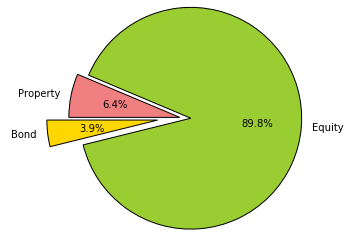

In [19]:
#remove 

labels = df2.index
sizes = df2["Pct of MV"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.2,0.1,0)

# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180, shadow=False)
 
plt.axis('equal')
plt.show()




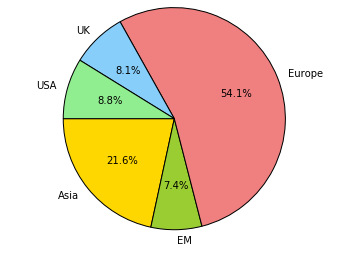

In [20]:
#Complete the same code for Region 

gb2 = df.groupby(df["Region"]).sum()
df3 = pd.DataFrame(gb2)
df3 = df3.drop(["Quantity"], axis =1)
df3 = df3.drop(["Close"], axis =1)
df3 = df3.drop(["MV"], axis =1)

labels = df3.index
sizes = df3["Pct of MV"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgreen']
explode = (0,0,0,0,0)

# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180, shadow=False)
 
plt.axis('equal')
plt.show()